### FLIGHT

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. 
To build a model that can predictthe Ticket fare  basis of the accumulated details like Airline	Date_of_Journey	Source	Destination	Route etc	

In [125]:
# importing librarires:

# Numpy and PANDAS
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine

#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
train_set = pd.read_excel('Data_Train.xlsx')
test_set = pd.read_excel('Test_set.xlsx')

In [3]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',train_set.shape,'\n')
print('Details dataset\n' ,train_set.info(),'\n')
print('Checking for NULL/Missing values \n',train_set.isna().sum())

Size of dataset 
  (10683, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
Details dataset
 None 

Checking for NULL/Missing values 
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration      

In [ ]:
test_set.head()

In [5]:
#Dataset details 
# more Info on the dataset 
print('Size of dataset \n ',test_set.shape,'\n')
print('Details dataset\n' ,test_set.info(),'\n')
print('Checking for NULL/Missing values \n',test_set.isna().sum())

Size of dataset 
  (2671, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
Details dataset
 None 

Checking for NULL/Missing values 
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: in

In [6]:
# description od both the datasets
train_set.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
# description of the dataset
train_set.describe(include=np.object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [8]:
train_set.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [9]:
test_set.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [10]:
# correlatioon check train
train_corr = train_set.corr()
train_corr

,Price
Price,1.0


In [11]:
# correlatioon check
test_corr = test_set.corr()
test_corr

""


* The train and test are already devided with 1.6K data test with 2.6K.
* <b> ALL FEATURES A CATEGORICAL </b>
* only 2 missing data in train set .
## we will append these sets for feature enginerring the data 

In [12]:
df = train_set.append(test_set)

In [14]:
# Combined Dataset details 
print('Size of dataset \n ',df.shape,'\n')

Size of dataset 
  (13354, 11) 



In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [16]:
# Handling the DataTIME columns

df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [18]:
# drop the data of journey column as therequired features are extracted.
df.drop(labels='Date_of_Journey', axis=1, inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4


In [20]:
#Convertig Duration into minutes
import re

df['Mintues'] = df.Duration.apply(lambda x: x[-3:-1])

df.Duration = df.Duration.apply(lambda x: int(re.findall('\d+',x[:2])[0])*60)

df.Duration = df.Mintues.astype('int') + df.Duration

In [21]:
df.drop(labels='Mintues', axis=1, inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1159,2 stops,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302.0,1,3,4


In [23]:
#Time as 5--11am morning;11-4pm aftenoon,4-9pm evening;rest  night

def deparrtime(x):
    x=x.strip()
    hr=(int)(x.split(':')[0])
    if(hr>=16 and hr<21):
        x='Evening'
    elif(hr>=21 or hr<5):
        x='Night'
    elif(hr>=5 and hr<11):
        x='Morning'
    elif(hr>=11 and hr<16):
        x='Afternoon'
    return x
df['Dep_Time']=df['Dep_Time'].apply(deparrtime)
df['Arrival_Time']=df['Arrival_Time'].apply(deparrtime)

In [24]:
# Converting total_stops to 0,1,2,3 respectively
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        str(x).strip()
        stps=str(x).split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)


pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

In [25]:
# Renaming Journey_Month  with Months.
df["Journey_Month"]=df["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) 

In [26]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302.0,1,March,4


In [27]:
df1 =df.copy() 

In [28]:
# Dropping Redundant Columns
df=df.drop(['Route'], axis=1) #based on stops we can get it 
df=df.drop(['Arrival_Time'], axis=1) #[fare is not dependent ]

In [29]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,No info,13302.0,1,March,4


In [30]:
df_corr = df.corr()
df_corr

,Duration,Price,Journey_Day,weekday
Duration,1.000000,0.506607,-0.022909,-0.008226
Price,0.506607,1.000000,-0.153738,0.051613
Journey_Day,-0.022909,-0.153738,1.000000,-0.082577
weekday,-0.008226,0.051613,-0.082577,1.000000


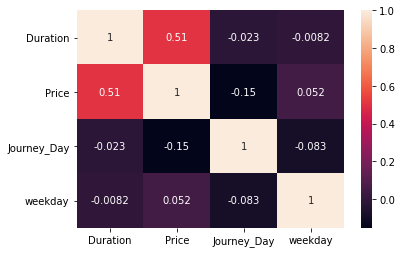

In [31]:
# Visualizing with help of heatmap

# plotting the correlation
sns.heatmap(df_corr,annot=True)
plt.show()

In [ ]:
# Univariate DATA Analysis

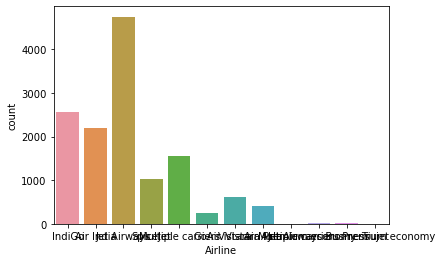

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [38]:
#Airline
sns.countplot(df.Airline)
plt.xticks(rotation = 0)
plt.show()
df.Airline.value_counts()

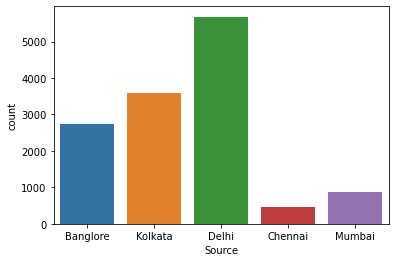

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [42]:
#Source
sns.countplot(df.Source)
plt.show()
df.Source.value_counts()

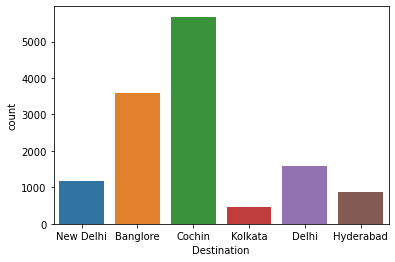

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [43]:
#Destination
sns.countplot(df.Destination)
plt.show()
df.Destination.value_counts()

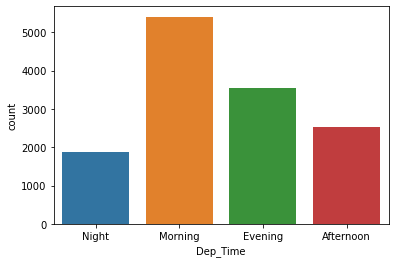

Morning      5407
Evening      3540
Afternoon    2535
Night        1872
Name: Dep_Time, dtype: int64

In [44]:
#Dep_Time
sns.countplot(df.Dep_Time)
plt.show()
df.Dep_Time.value_counts()

* Most Busy airport is Bangaluru as the source and Dest count is higher as compare to others
* Delhi has high onboarding and Cochin has a higher arrival 
* Most flghts are from 5-11 am  or 4-9 PM

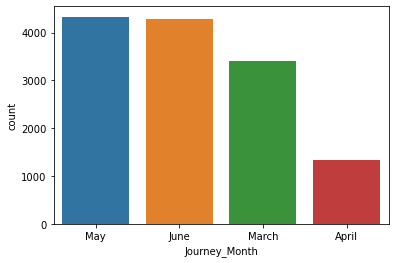

In [47]:
#Journey_Month
sns.countplot(df.Journey_Month,order=df.Journey_Month.value_counts().index)
plt.show()

In [55]:
df.groupby(['Journey_Month']).mean()

,Duration,Price,Journey_Day,weekday
Journey_Month,,,,
April,380.868124,5770.847081,11.004521,2.202713
June,650.598927,8828.796134,12.178021,3.055063
March,689.081184,10673.205580,13.775791,3.514361
May,681.210672,9127.247548,15.016632,2.592285


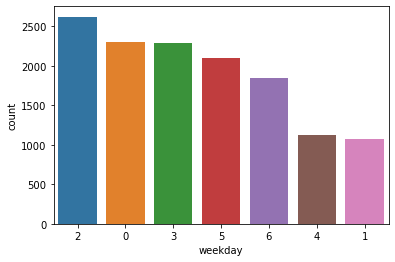

In [48]:
#weekday
sns.countplot(df.weekday,order=df.weekday.value_counts().index)
plt.show()

In [56]:
df.groupby(['weekday']).mean()

,Duration,Price,Journey_Day
weekday,,,
0,616.146077,8499.530811,13.653663
1,654.521375,9026.149597,17.436803
2,686.256009,9277.514190,12.080122
3,700.318441,8931.379367,14.586071
4,470.275647,9717.996700,14.067797
5,636.006676,8972.905389,12.087744
6,654.343970,9525.508820,12.150892


* Prices are high on FRIDAYS and low on Mondays

In [49]:
#Multi-variate Analysis

In [52]:
df.sample(5)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
1554,IndiGo,Banglore,Delhi,Morning,165,0,No info,3943.0,24,June,0
6646,Multiple carriers,Delhi,Cochin,Morning,793,1,No info,13587.0,6,June,3
8404,Air India,Delhi,Cochin,Morning,555,1,No info,8372.0,21,May,1
5116,Air India,Delhi,Cochin,Morning,1535,1,No info,6587.0,27,April,5
176,SpiceJet,Kolkata,Banglore,Afternoon,315,1,No info,NaN,6,May,0


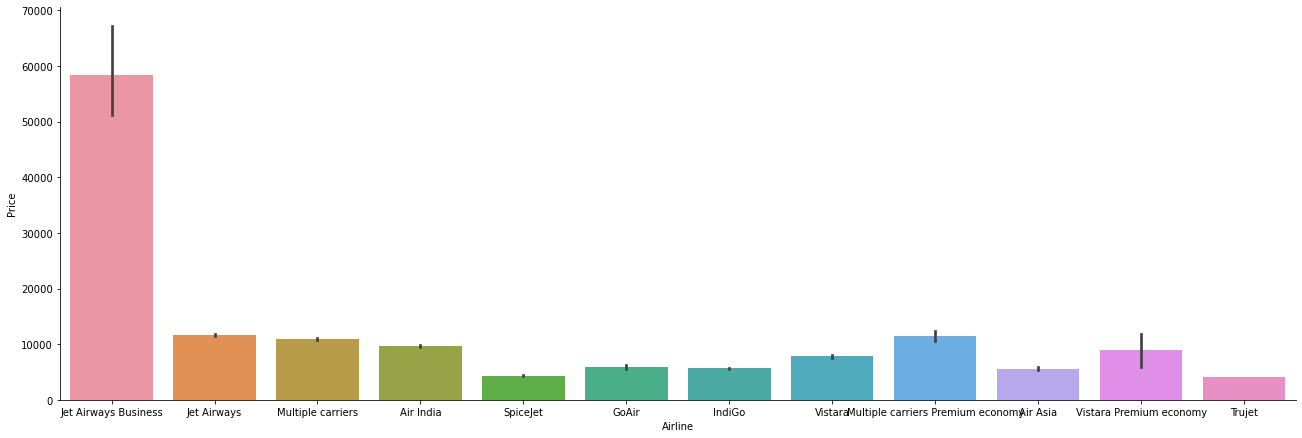

In [53]:
# AIRLINE vs PRICE
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

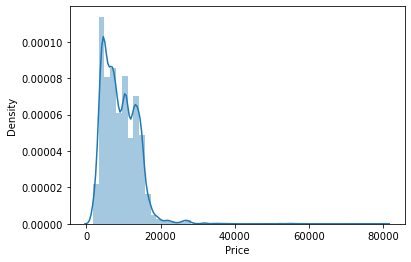

In [54]:
sns.distplot(df['Price'])
plt.show()

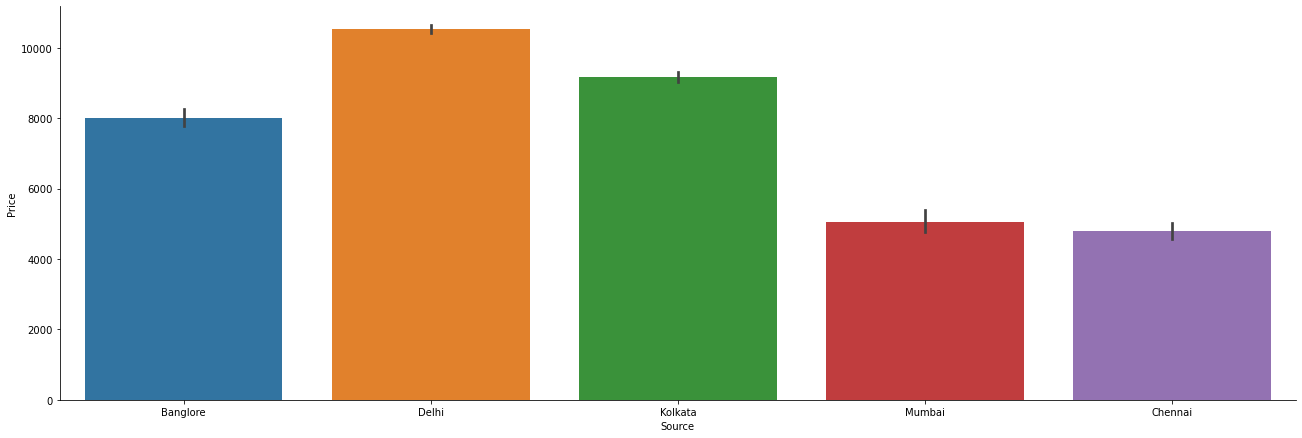

In [57]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

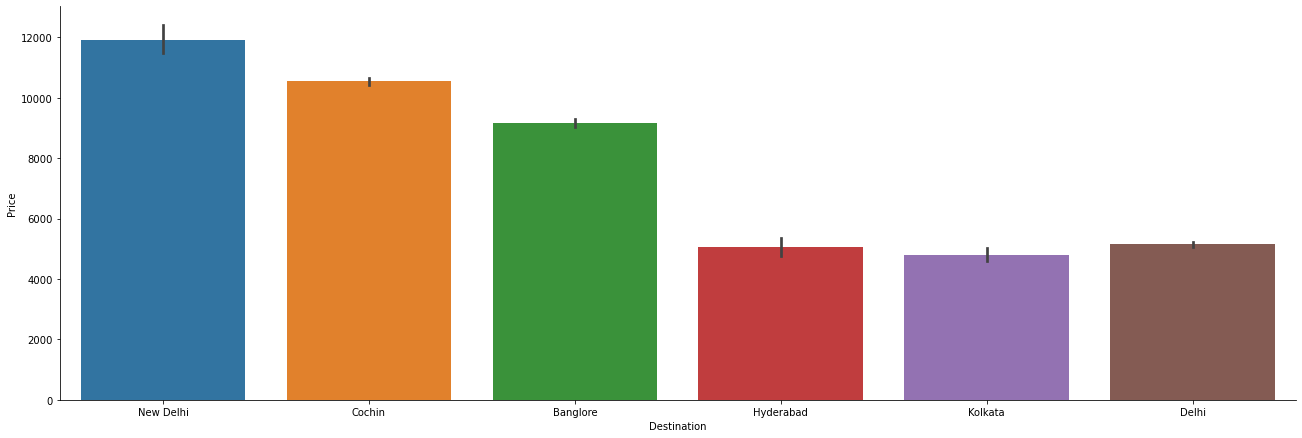

In [58]:
# Destination vs PRICE
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

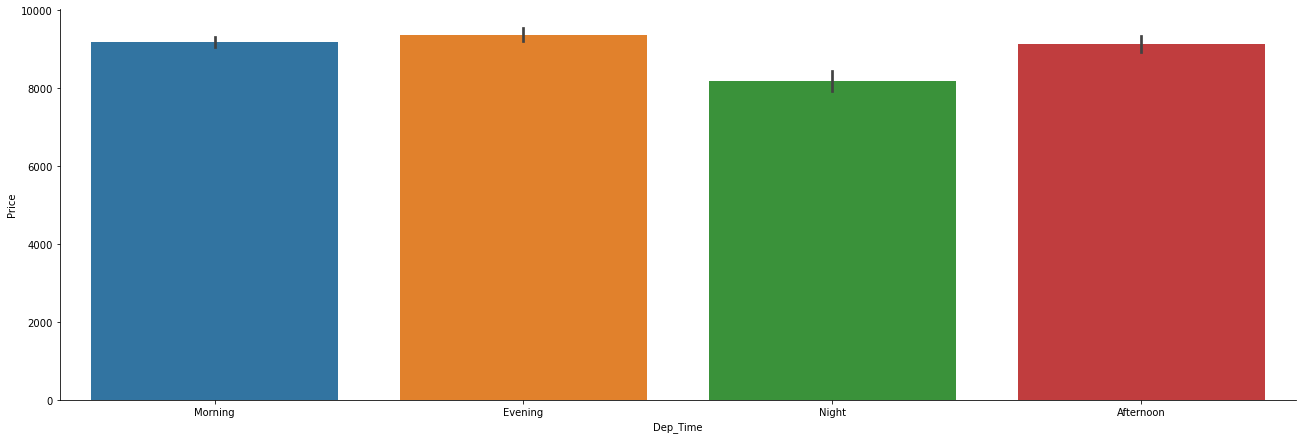

In [59]:
# DEP TIME  vs PRICE
sns.catplot(y='Price',x='Dep_Time',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

* FLights with better convinient timings like Evening has highrr price , Monring and night have relatilvle lower than Evening .
* Night has  Cheapest 

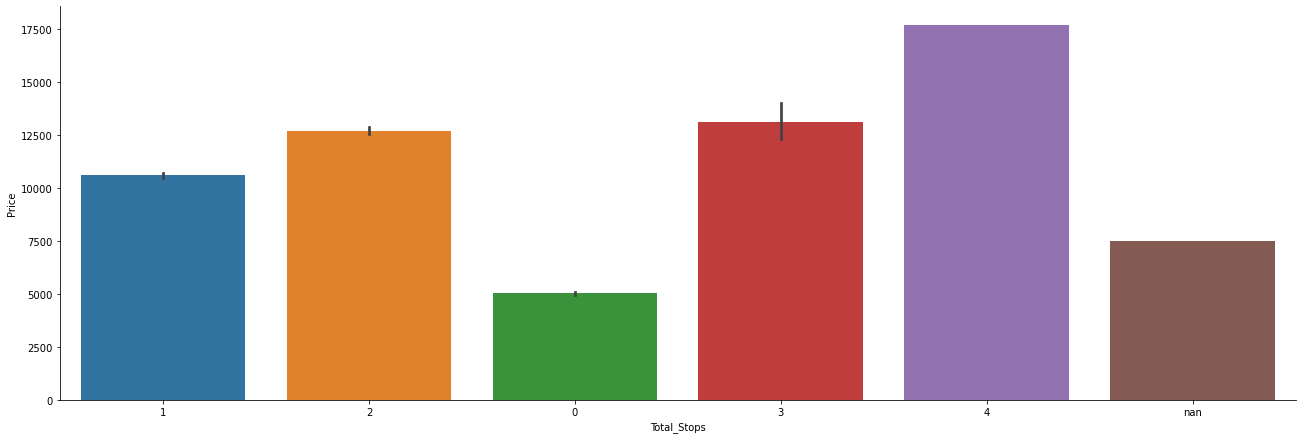

In [61]:
# Total_Stops Vs Price
sns.catplot(y='Price',x='Total_Stops',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

* Naturally the price increases with halts 

In [62]:
df.Additional_Info.value_counts()/len(df) * 100

No info                         78.575708
In-flight meal not included     18.166841
No check-in baggage included     2.965404
1 Long layover                   0.149768
Change airports                  0.059907
Business class                   0.037442
No Info                          0.022465
Red-eye flight                   0.007488
2 Long layover                   0.007488
1 Short layover                  0.007488
Name: Additional_Info, dtype: float64

In [63]:
# Since 78 perecent of data are missing we wil drop this column
df.drop('Additional_Info',1,inplace=True)

In [65]:
cat_col,num_col=[],[]
for i in df:
    if df[i].dtype=='O':
        cat_col.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_col))
print('>>> Number of Numerical Feature::', len(num_col))

>>> Total Number of Feature:: 10
>>> Number of categorical features:: 6
>>> Number of Numerical Feature:: 6


In [66]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Dep_Time',
 'Total_Stops',
 'Journey_Month']

In [67]:
num_col

['Duration', 'Price', 'Journey_Day', 'weekday']

In [68]:
from sklearn.preprocessing import LabelEncoder

lab_enc =LabelEncoder()

In [71]:
for i in cat_col:
    df[i]=lab_enc.fit_transform(df[i])

In [72]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,170,0,3897.0,24,2,6
1,1,3,0,2,445,2,7662.0,1,3,2
2,4,2,1,2,1159,2,13882.0,9,1,6
3,3,3,0,1,325,1,6218.0,12,3,6
4,3,0,5,1,285,1,13302.0,1,2,4


In [73]:
df_train = df[~df.Price.isna()]

In [75]:
df_train.shape

(10683, 10)

In [74]:
df_test = df[df.Price.isna()]

In [76]:
df_test.shape

(2671, 10)

In [ ]:
#Dealing Outliers

In [78]:
z_scores = stats.zscore(df_train[num_col])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_train = df_train[filtered_entries]

In [ ]:
# Splitting the dataset into X and y.

In [79]:
X = df_train.drop('Price',1)
y = df_train['Price']

In [ ]:
#Train and TRAIN_TEST split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [82]:
# checking the shape
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((7369, 9), (7369,), (3159, 9), (3159,))

In [83]:
# checking the shape
#shapes
print ('XTRAIN \n',X_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',X_val.shape)
print ('YTRAIN \n',y_val.shape)


XTRAIN 
 (7369, 9)
YTRAIN 
 (7369,)
XTEST 
 (3159, 9)
YTRAIN 
 (3159,)


### Building the model

In [85]:
# import Models
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [86]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [87]:
#Design a reusable funtion 
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    print('MSE:',mean_squared_error(y_val,y_preds))
    print('R2_Score',r2_score(y_val,y_preds)) 

In [88]:
# Model1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 8148120.587022088
R2_Score 0.5100815518785173


In [89]:
# Model2: Ridge Regression
train_n_ret_scores(Ridge())

MSE: 8148191.78661949
R2_Score 0.5100772708917678


In [90]:
# Model3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 8148120.589969974
R2_Score 0.510081551701271


In [91]:
# Model4 : KNN
train_n_ret_scores(KNeighborsRegressor())

MSE: 6837890.721709402
R2_Score 0.5888611643598058


In [92]:
# Model5: SVR
train_n_ret_scores(SVR(kernel='linear'))

MSE: 10219717.979856007
R2_Score 0.3855235303089536


In [93]:
# Model6: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 5687174.818501988
R2_Score 0.658049751286957


In [94]:
# Model7: Random Forest
train_n_ret_scores(RandomForestRegressor())

MSE: 3938115.1513332403
R2_Score 0.7632146894661993


In [95]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),RandomForestRegressor()]
model_names = 'Linear Ridge KNN SVR Descision_Tree Random_Forest '.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    
    mse = mean_squared_error(y_val,y_preds)
    r2 = r2_score(y_val,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)
models_df

LinearRegression()
Ridge(alpha=0.001)
KNeighborsRegressor()
SVR()
DecisionTreeRegressor()
RandomForestRegressor()


,Model,MSE,R2,meanCV
0,Linear,8.148121e+06,0.510082,0.505262
1,Ridge,8.148121e+06,0.510082,0.505262
2,KNN,6.837891e+06,0.588861,0.590159
3,SVR,1.328986e+07,0.200926,0.217065
4,Descision_Tree,5.740070e+06,0.654869,0.669675
5,Random_Forest,3.907742e+06,0.765041,0.775524


In [ ]:
best_model = RandomForestRegressor()

### BEST MODEL after considering Cross Validation will be Random Forest as the difference for it model  is lower amongst all

### HyperParaneter Tuning for RANDOM FOREST

In [118]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':[200,700],'min_samples_split':[5,6],
            'max_features': ['auto','sqrt']}


In [122]:
GSV = GridSearchCV(RandomForestRegressor(),parameters,cv=2)
GSV.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 6],
                         'n_estimators': [200, 700]})

### BEST PARAMS 

In [123]:
GSV.best_params_

{'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 200}

### REDESIGN THE MODEL WITH RECOMENDED PARAMETERS by GridSearchCV

In [112]:
best_model = RandomForestRegressor(n_estimators=200,min_samples_split=5,max_features='sqrt')

In [113]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=5,
                      n_estimators=200)

In [114]:
best_model.score(X_val,y_val)

0.7762426974192872

### TEST SET EAVLUATION

In [115]:
df_test.drop('Price',1,inplace=True)

In [116]:
test_prediction = best_model.predict(df_test)

### Saving Model

In [117]:
#Saving Model 
import joblib
joblib.dump(best_model,'Flight.pk1')


['Flight.pk1']